In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import signal
import os
import glob
%matplotlib inline
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from readTRC import readTrc
from scipy.fftpack import rfft, irfft, fftfreq

In [2]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

def find_vals(X,Y,cut):
    dataX = X[cut:]
    dataY = Y[cut:]
    minn = min(dataY)
    sig_val = minn*0.5
    MeanLoc = np.where(dataY==minn)[0][0]
    Mean = dataX[MeanLoc]
    L = dataY[0:MeanLoc]
    R = dataY[MeanLoc:len(dataY)]
    LP =find_nearest(L,sig_val)
    RP =find_nearest(R,sig_val)
    whereL = np.where(L==LP)[0][0]
    whereR = np.where(R==RP)[0][0]
    Lpoint = dataX[whereL]
    Rpoint = dataX[MeanLoc+whereR]
    FWHM = (Rpoint-Lpoint)   
    return (Mean,FWHM)
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [3]:
cd /Users/austinmcdonald/Desktop/electron-drift-trial-0/

/Users/austinmcdonald/Desktop/electron-drift-trial-0


In [4]:
#PATH = '/Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/090418-cleaned-2bar/'
files = glob.glob('*.txt')
#files.remove('.DS_Store')
#files.remove('Gol-350.txt')
#files.remove('Sig-350.txt')
files.sort()
len(files)

22

In [5]:
files.remove('Gol-Ed050-Ext100.txt')
files.remove('Gol-Ed050-Ext300.txt')
files.remove('Sig-Ed050-Ext100.txt')
files.remove('Sig-Ed050-Ext300.txt')

In [6]:
files

['Gol-Ed010-Ext200.txt',
 'Gol-Ed020-Ext200.txt',
 'Gol-Ed030-Ext200.txt',
 'Gol-Ed040-Ext200.txt',
 'Gol-Ed050-Ext200.txt',
 'Gol-Ed100-Ext200.txt',
 'Gol-Ed150-Ext200.txt',
 'Gol-Ed200-Ext200.txt',
 'Gol-Ed250-Ext200.txt',
 'Sig-Ed010-Ext200.txt',
 'Sig-Ed020-Ext200.txt',
 'Sig-Ed030-Ext200.txt',
 'Sig-Ed040-Ext200.txt',
 'Sig-Ed050-Ext200.txt',
 'Sig-Ed100-Ext200.txt',
 'Sig-Ed150-Ext200.txt',
 'Sig-Ed200-Ext200.txt',
 'Sig-Ed250-Ext200.txt']

In [7]:
names = []
for q in range(0,len(files)):
    na = files[q].split('.')[0]
    names.append(na)
names

['Gol-Ed010-Ext200',
 'Gol-Ed020-Ext200',
 'Gol-Ed030-Ext200',
 'Gol-Ed040-Ext200',
 'Gol-Ed050-Ext200',
 'Gol-Ed100-Ext200',
 'Gol-Ed150-Ext200',
 'Gol-Ed200-Ext200',
 'Gol-Ed250-Ext200',
 'Sig-Ed010-Ext200',
 'Sig-Ed020-Ext200',
 'Sig-Ed030-Ext200',
 'Sig-Ed040-Ext200',
 'Sig-Ed050-Ext200',
 'Sig-Ed100-Ext200',
 'Sig-Ed150-Ext200',
 'Sig-Ed200-Ext200',
 'Sig-Ed250-Ext200']

In [8]:
ml = 1e3
avg=5
Xvals=dict()
Yvals=dict()
for q in range(0,len(files)):
    Hold = np.loadtxt(files[q])
    Xvals[q] = moving_average(Hold[0]*ml,avg)
    Yvals[q] = moving_average(Hold[1]*ml,avg)

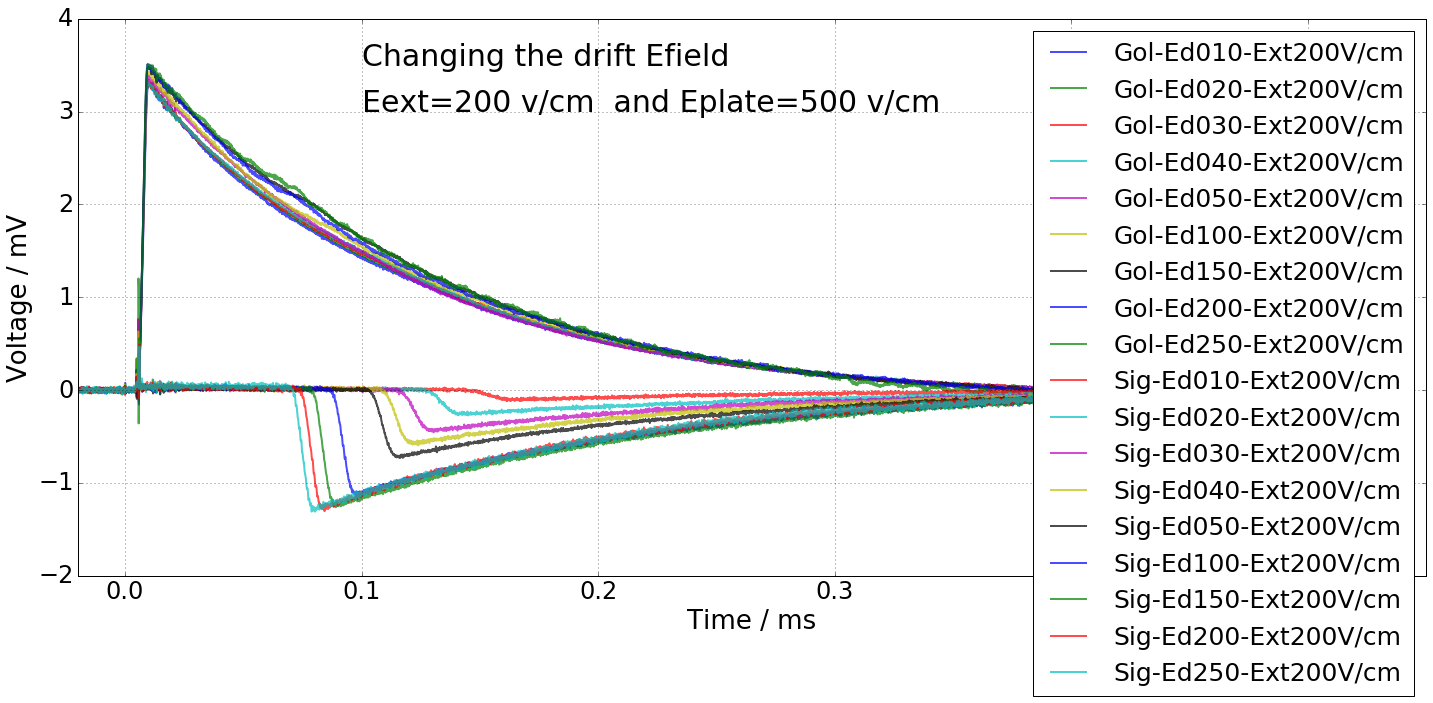

In [9]:
plt.figure(figsize=(20,9))

for q in range(0,len(files)):
    XX = Xvals[q]
    YY = Yvals[q]
    plt.plot(XX,YY,label=(names[q]+''+'V/cm'),alpha=0.7,linewidth=2)
    
#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(-0.02,0.55)

#plt.ylim(-.6,.02)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('plot-1.tif')
#plt.axvline(0.025,linewidth=2,color='k')
#plt.axvline(0.01,linewidth=2,color='r')
plt.text(0.1,3.5,'Changing the drift Efield',fontsize=30)
plt.text(0.1,3,'Eext=200 v/cm  and Eplate=500 v/cm',fontsize=30)
#plt.axvline(0.085,linewidth=2,color='m')


plt.show()

6741.22857736
242.895269569


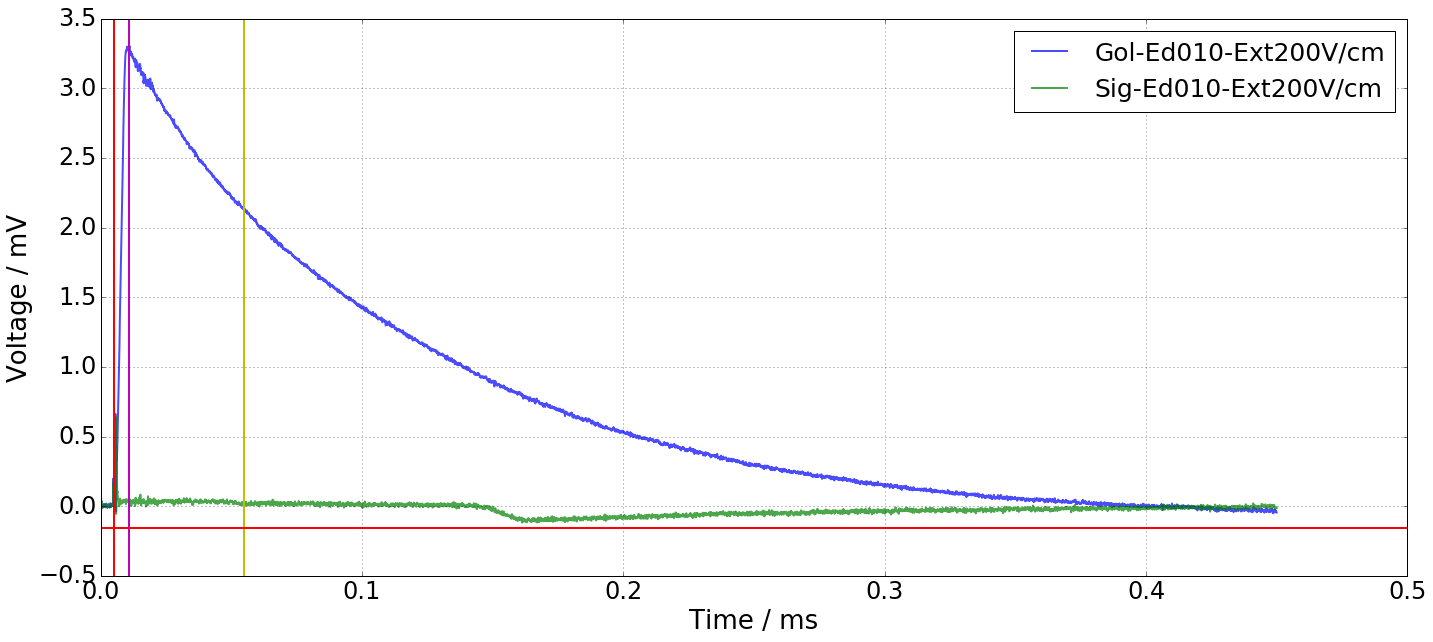

In [10]:
plt.figure(figsize=(20,9))

A = 0
B = 9

XX = Xvals[A]
YY = Yvals[A]
plt.plot(XX,YY,label=(names[A]+''+'V/cm'),alpha=0.7,linewidth=2)
aa = find_nearest(XX,0)
L = np.where(XX == aa)[0][0]
aa = find_nearest(XX,0.45)
R = np.where(XX == aa)[0][0]
GOLDsum = sum(abs(YY[L:R]))

XX = Xvals[B]
YY = Yvals[B]
plt.plot(XX,YY,label=(names[B]+''+'V/cm'),alpha=0.7,linewidth=2)
aa = find_nearest(XX,0.065)
L = np.where(XX == aa)[0][0]
aa = find_nearest(XX,0.35)
R = np.where(XX == aa)[0][0]
SIGsum = sum(abs(YY[L:R]))

#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(0,0.5)
#plt.ylim(-.05,.15)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('plot-1.tif')
plt.axvline(0.055,linewidth=2,color='y')

plt.axvline(0.011,linewidth=2,color='m')
plt.axvline(0.005,linewidth=2,color='r')
plt.axhline(-0.160,linewidth=2,color='r')

print(GOLDsum)
print(SIGsum)

plt.show()

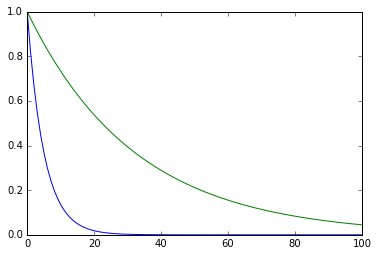

In [11]:
def func(x, a, tau):
    return a * np.exp(- x/tau) #+ c
xx = np.linspace(0,100,100)

plt.plot(xx,func(xx,1,5))
plt.plot(xx,func(xx,1,5*6.44))

6524.65487788
207.529087428


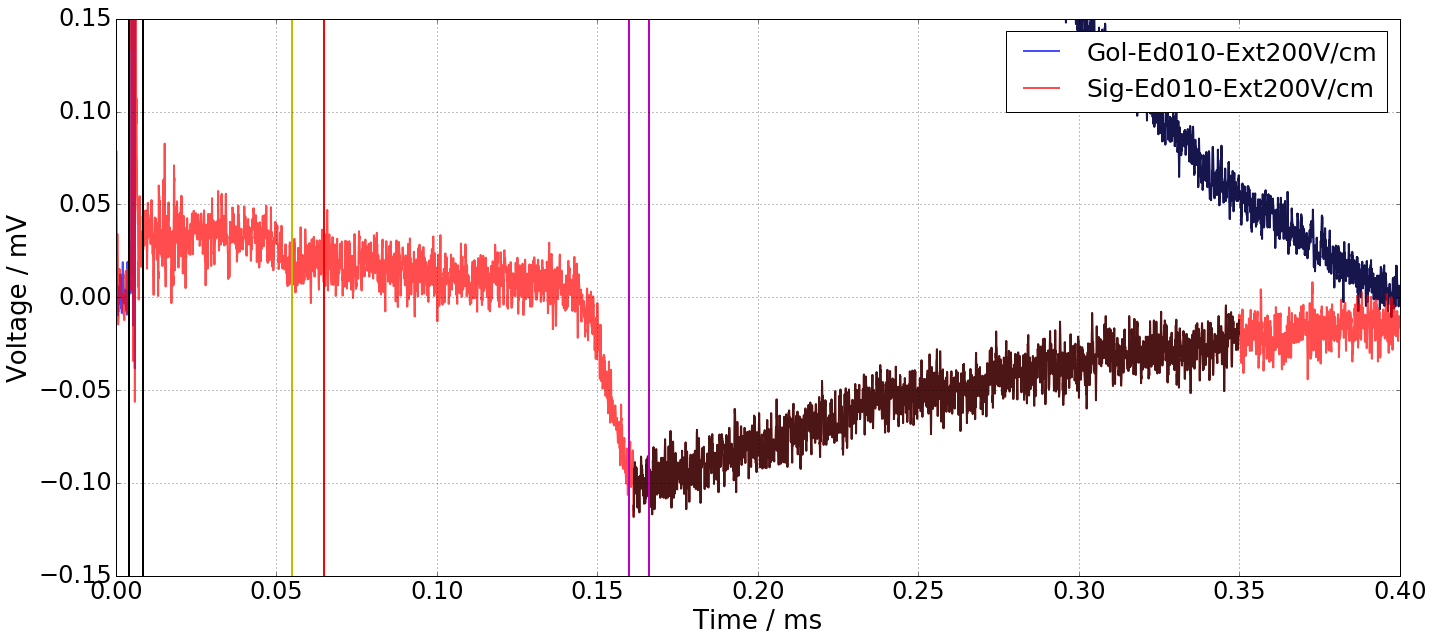

In [12]:
plt.figure(figsize=(20,9))
AH = 0
A = 0+AH
B = 9+AH

XX = Xvals[A]
YY = Yvals[A]
plt.plot(XX,YY,label=(names[A]+''+'V/cm'),alpha=0.7,linewidth=2,color='b')
aa = find_nearest(XX,0)
L = np.where(XX == aa)[0][0]
L = np.where(YY == max(YY))[0][0] # added this for exp fit
T0=Xvals[A][L]
aa = find_nearest(XX,0.45)
R = np.where(XX == aa)[0][0]
GOLDsum = sum(abs(YY[L:R]))
plt.plot(XX[L:R],YY[L:R],alpha=0.7,linewidth=2,color='k')
golF = YY[L:R]

XX = Xvals[B]
YY = Yvals[B]
plt.plot(XX,YY,label=(names[B]+''+'V/cm'),alpha=0.7,linewidth=2,color='r')
aa = find_nearest(XX,0.065)
L = np.where(XX == aa)[0][0]
L = np.where(YY == min(YY))[0][0] # added this for exp fit
T1=Xvals[A][L]
aa = find_nearest(XX,0.35)
R = np.where(XX == aa)[0][0]
SIGsum = sum(abs(YY[L:R]))
plt.plot(XX[L:R],YY[L:R],alpha=0.7,linewidth=2,color='k')
sigF = abs(YY[L:R])

#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(0,0.4)
plt.ylim(-.15,.15)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('plot-1.tif')
plt.axvline(0.055,linewidth=2,color='y')

plt.axvline(0.45,linewidth=2,color='m')
plt.axvline(0.065,linewidth=2,color='r')
plt.axhline(-0.160,linewidth=2,color='r')
plt.axvline(0.004,linewidth=2,color='k')
plt.axvline(0.0085,linewidth=2,color='k')

plt.axvline(0.160,linewidth=2,color='m')
plt.axvline(0.166,linewidth=2,color='m')

print(GOLDsum)
print(SIGsum)

plt.show()

In [13]:
T0

0.010924910027910073

In [14]:
T1

0.16132491178549913

In [15]:
13.8*1e-5/((T1-T0)*1e-3) # km/s

0.91755318076674597

In [16]:
Efid = np.array([10,20,30,40,50,100,150,200,250])

In [23]:
AH = None
Vd=[]
yr=[]
for AH in range(0,len(Efid)):
    A = 0+AH
    B = 9+AH

    XX = Xvals[A]
    YY = Yvals[A]
    aa = find_nearest(XX,0)
    L = np.where(XX == aa)[0][0]
    L = np.where(YY == max(YY))[0][0] # added this for exp fit
    T0=Xvals[A][L]

    XX = Xvals[B]
    YY = Yvals[B]
    aa = find_nearest(XX,0.065)
    L = np.where(XX == aa)[0][0]
    L = np.where(YY == min(YY))[0][0] # added this for exp fit
    T1=Xvals[A][L]
    DT = ((T1-T0)*1e-3)
    er = np.sqrt((.1/13.8)**2+2*(6e-6/DT)**2)
    Vd.append(13.8*1e-5/DT)
    yr.append(er)


In [24]:
len(Vd)

9

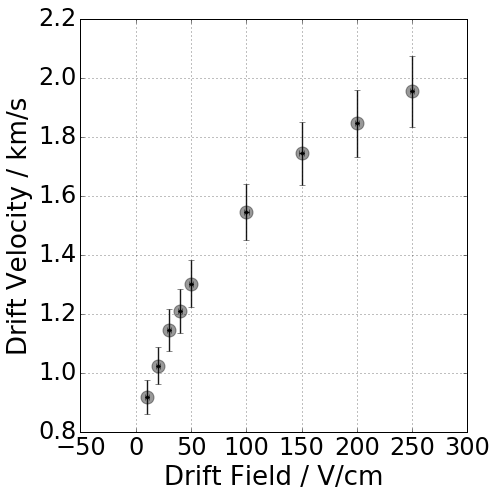

In [25]:
plt.figure(figsize=(7,7))

plt.scatter(Efid,Vd,s=170,color='k',alpha=0.4)
plt.errorbar(Efid,Vd,yerr=yr,xerr=2,color='k',alpha=0.9,fmt='D',markersize=3,linewidth=1.4)

plt.xlabel(r'Drift Field / V/cm',fontsize=26)
plt.ylabel('Drift Velocity / km/s',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
#plt.ylim(0,0.4)
plt.grid()
plt.tight_layout()

In [34]:
AH = None
Vd=[]
yr=[]
for AH in range(0,len(Efid)):
    A = 0+AH
    B = 9+AH

    XX = Xvals[A]
    YY = Yvals[A]
    aa = find_nearest(XX,0)
    L = np.where(XX == aa)[0][0]
    L = np.where(YY == max(YY))[0][0] # added this for exp fit
    T0=Xvals[A][L]

    XX = Xvals[B]
    YY = Yvals[B]
    aa = find_nearest(XX,0.065)
    L = np.where(XX == aa)[0][0]
    L = np.where(YY == min(YY))[0][0] # added this for exp fit
    T1=Xvals[A][L]
    DT = ((T1-T0)*1e-3)
    er = np.sqrt((.1/13.8*0)**2+2*(6e-6/DT)**2 +(.1/2)**2 )
    Vd.append(13.8*1e-5/DT)
    yr.append(er)

In [36]:
yr

[0.075385683545928353,
 0.080407026135404555,
 0.086339329047495111,
 0.089639887751275474,
 0.094382065130689294,
 0.10737220471267689,
 0.11829170297164193,
 0.12403935505742009,
 0.13009513947117765]

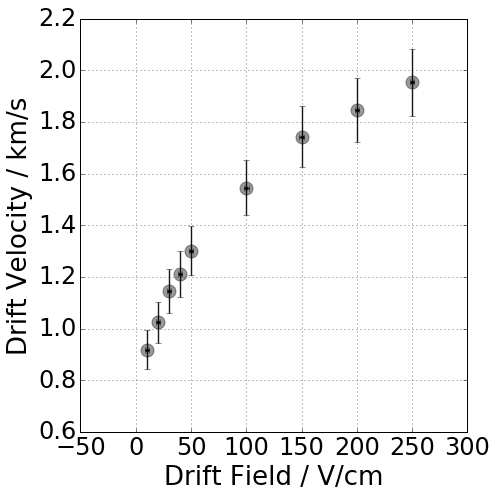

In [35]:
plt.figure(figsize=(7,7))

plt.scatter(Efid,Vd,s=170,color='k',alpha=0.4)
plt.errorbar(Efid,Vd,yerr=yr,xerr=2,color='k',alpha=0.9,fmt='D',markersize=3,linewidth=1.4)

plt.xlabel(r'Drift Field / V/cm',fontsize=26)
plt.ylabel('Drift Velocity / km/s',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
#plt.ylim(0,0.4)
plt.grid()
plt.tight_layout()

(0, 2.2)

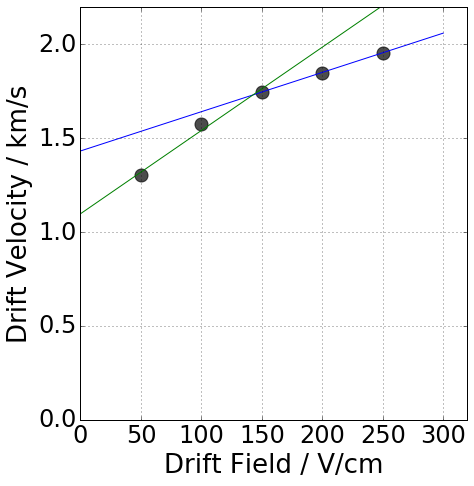

In [85]:
import numpy.polynomial.polynomial as poly

plt.figure(figsize=(7,7))

plt.scatter(Efid,Vd,s=170,color='k',alpha=0.7)

coefs = poly.polyfit(Efid[2:5], Vd[2:5], 1)
xnew = np.linspace(0,300,20)
ffit = poly.polyval(xnew, coefs)
plt.plot(xnew, ffit,color='blue')

coefs = poly.polyfit(Efid[0:3], Vd[0:3], 1)
xnew = np.linspace(0,300,20)
ffit = poly.polyval(xnew, coefs)
plt.plot(xnew, ffit,color='g')

plt.xlabel(r'Drift Field / V/cm',fontsize=26)
plt.ylabel('Drift Velocity / km/s',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.tight_layout()
plt.xlim(0,320)
plt.ylim(0,2.2)

In [146]:
cd /Users/austinmcdonald/Desktop/electron-drift-trial-0/anode-change/

/Users/austinmcdonald/Desktop/electron-drift-trial-0/anode-change


In [147]:
#PATH = '/Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/090418-cleaned-2bar/'
files = glob.glob('*.txt')
files.sort()
len(files)

8

In [148]:
names = []
for q in range(0,len(files)):
    na = files[q].split('.')[0]
    names.append(na)
names

['Gol-Vd050-100',
 'Gol-Vd050-200',
 'Gol-Vd050-250',
 'Gol-Vd050-500',
 'Sig-Vd050-100',
 'Sig-Vd050-200',
 'Sig-Vd050-250',
 'Sig-Vd050-500']

In [149]:
ml = 1e3
avg=5
Xvals=dict()
Yvals=dict()
for q in range(0,len(files)):
    Hold = np.loadtxt(files[q])
    Xvals[q] = moving_average(Hold[0]*ml,avg)
    Yvals[q] = moving_average(Hold[1]*ml,avg)

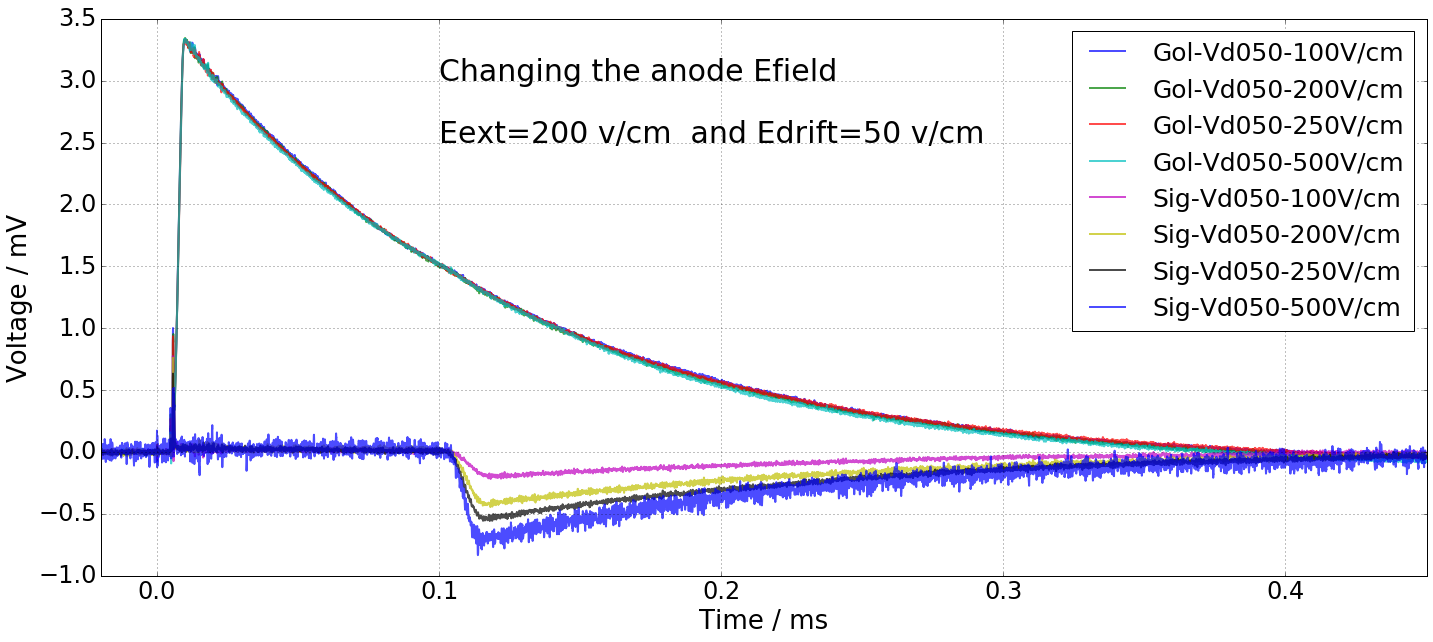

In [155]:
plt.figure(figsize=(20,9))

for q in range(0,len(files)):
    XX = Xvals[q]
    YY = Yvals[q]
    plt.plot(XX,YY,label=(names[q]+''+'V/cm'),alpha=0.7,linewidth=2)
    
#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(-0.02,0.45)

#plt.ylim(-.6,.02)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
plt.text(0.1,3,'Changing the anode Efield',fontsize=30)
plt.text(0.1,2.5,'Eext=200 v/cm  and Edrift=50 v/cm',fontsize=30)

#plt.savefig('plot-1.tif')
#plt.axvline(0.025,linewidth=2,color='k')
#plt.axvline(0.01,linewidth=2,color='r')

#plt.axvline(0.085,linewidth=2,color='m')


plt.show()

In [156]:
cd /Users/austinmcdonald/Desktop/electron-drift-trial-0/cathode-change/

/Users/austinmcdonald/Desktop/electron-drift-trial-0/cathode-change


In [157]:
files = glob.glob('*.txt')
files.sort()
len(files)

6

In [158]:
names = []
for q in range(0,len(files)):
    na = files[q].split('.')[0]
    names.append(na)
names

['Gol-Vd050-100',
 'Gol-Vd050-200',
 'Gol-Vd050-300',
 'Sig-Vd050-100',
 'Sig-Vd050-200',
 'Sig-Vd050-300']

In [159]:
ml = 1e3
avg=5
Xvals=dict()
Yvals=dict()
for q in range(0,len(files)):
    Hold = np.loadtxt(files[q])
    Xvals[q] = moving_average(Hold[0]*ml,avg)
    Yvals[q] = moving_average(Hold[1]*ml,avg)

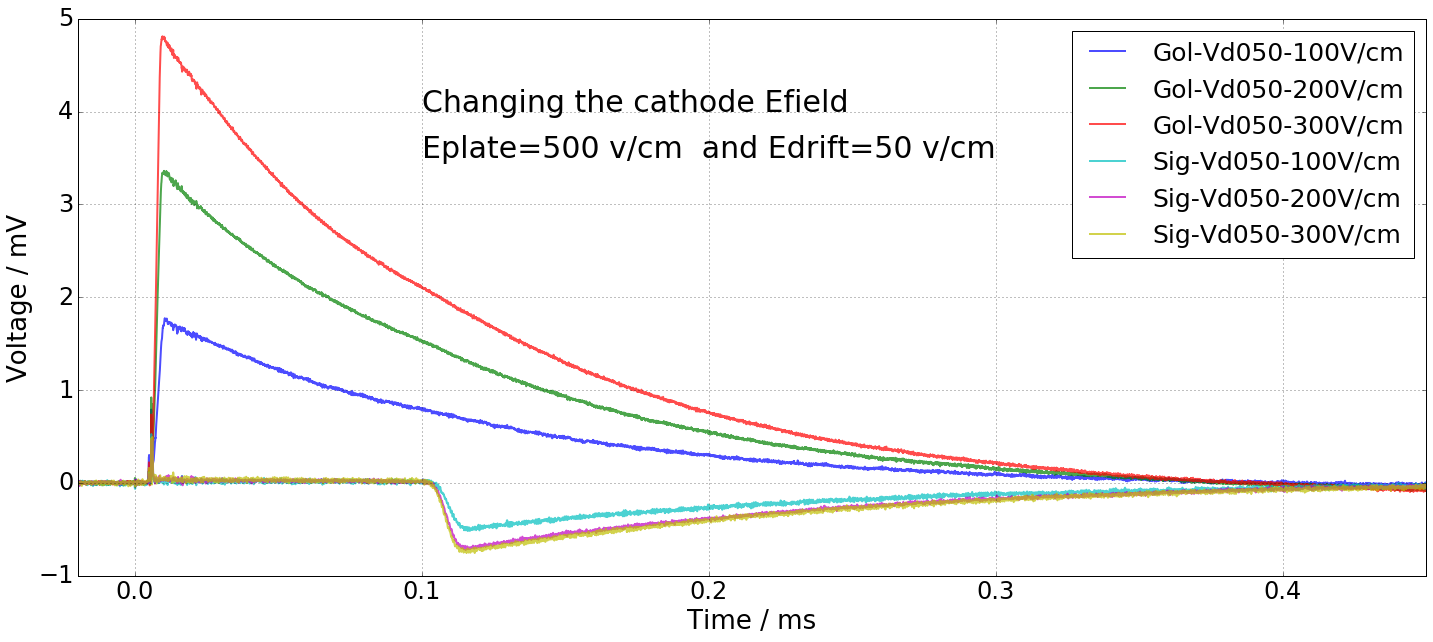

In [161]:
plt.figure(figsize=(20,9))

for q in range(0,len(files)):
    XX = Xvals[q]
    YY = Yvals[q]
    plt.plot(XX,YY,label=(names[q]+''+'V/cm'),alpha=0.7,linewidth=2)
    
#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(-0.02,0.45)

#plt.ylim(-.6,.02)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
plt.text(0.1,4,'Changing the cathode Efield',fontsize=30)
plt.text(0.1,3.5,'Eplate=500 v/cm  and Edrift=50 v/cm',fontsize=30)

#plt.savefig('plot-1.tif')
#plt.axvline(0.025,linewidth=2,color='k')
#plt.axvline(0.01,linewidth=2,color='r')

#plt.axvline(0.085,linewidth=2,color='m')


plt.show()

RC = 0.1180992966


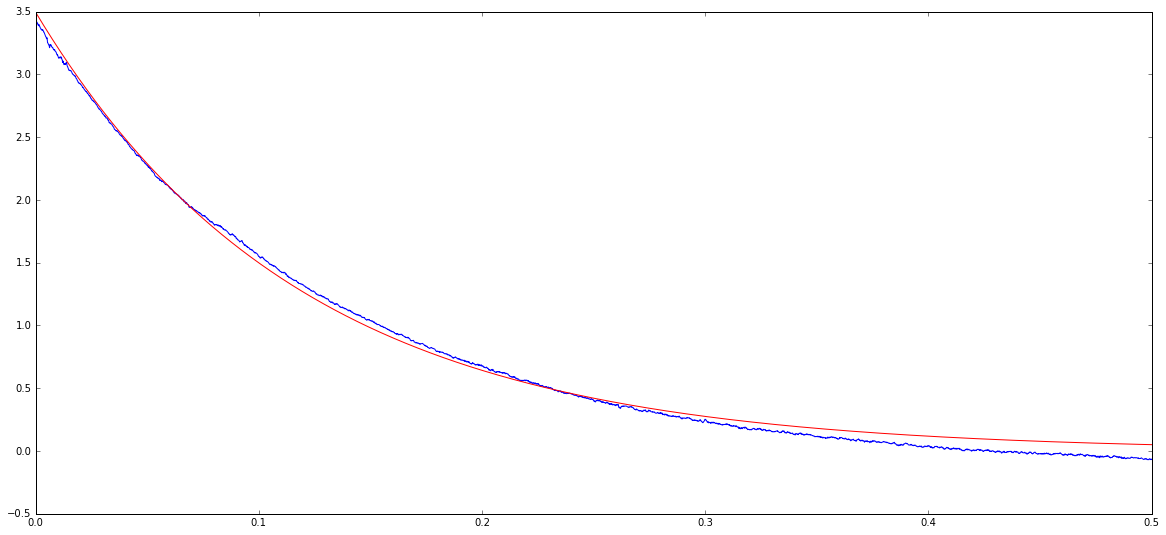

In [136]:
plt.figure(figsize=(20,9))
LL = len(golF)
xxx = np.linspace(0,0.5,LL)
plt.plot(xxx,golF)

def func(x, a, tau):
    return a * np.exp(- x/tau) #+ c
popt, pcov = curve_fit(func, xxx, golF)
plt.plot(xxx, func(xxx, *popt), 'r-', label="Fitted Curve")
print('RC =',popt[1])
plt.show()

In [137]:
popt

array([ 3.49565638,  0.1180993 ])

RC = 0.260186314085


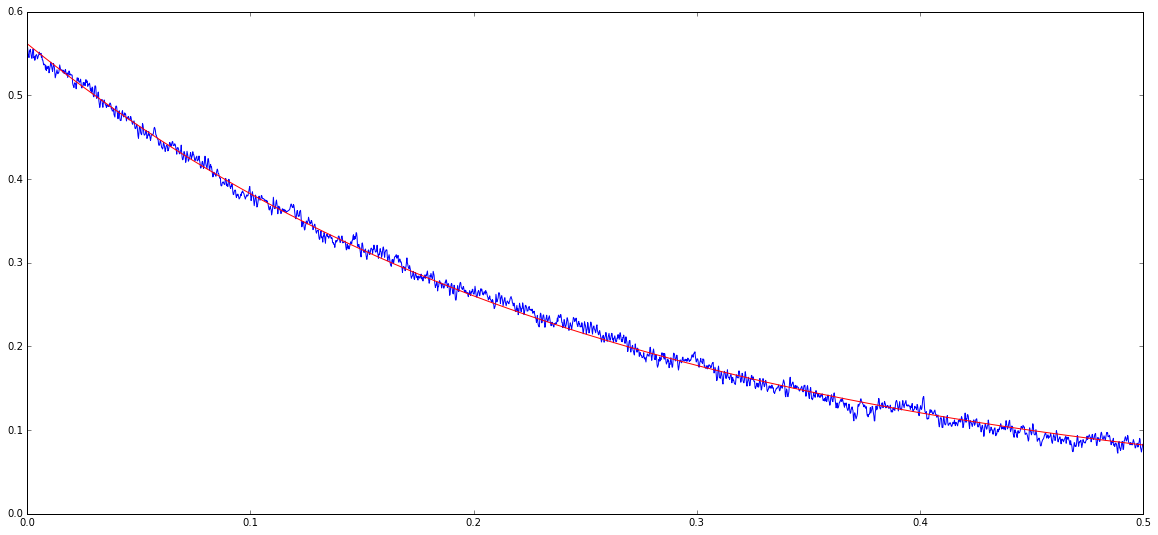

In [138]:
plt.figure(figsize=(20,9))
LL = len(sigF)
xxx = np.linspace(0,0.5,LL)
plt.plot(xxx,sigF)

def func(x, a, tau):
    return a * np.exp(- x/tau) #+ c
popt, pcov = curve_fit(func, xxx, sigF)
plt.plot(xxx, func(xxx, *popt), 'r-', label="Fitted Curve")
print('RC =',popt[1])
plt.show()

In [27]:
GOLD  = []
SIG   = []
GOLDM = []
SIGM  = []
extr  = []
for x in range(0,4):
    A = 0+x
    B = 5+x
    #EXT = int(names[x].split('-')[1])
    EXT=200
    Corr = 1#EXT/100
    
    XX = Xvals[A]
    YY = Yvals[A]
    aa = find_nearest(XX,0)
    L = np.where(XX == aa)[0][0]
    aa = find_nearest(XX,0.45)
    R = np.where(XX == aa)[0][0]
    GOLDsum = sum(abs(YY[L:R]))
    maxx = abs(np.mean(YY[1600:1900]) - max(YY[L:R]))
    GOLDM.append( maxx*1.025)
    GOLD.append(GOLDsum*1.15)
    
    
    XX = Xvals[B]
    YY = Yvals[B]
    aa = find_nearest(XX,0.065)
    L = np.where(XX == aa)[0][0]
    aa = find_nearest(XX,0.35)
    R = np.where(XX == aa)[0][0]
    SIGsum = sum(abs(YY[L:R]))*Corr
    ugh = np.mean(YY[2120:2300])
    if ugh<0:
        hh = min(YY[L:R])+ np.mean(YY[2120:2300])
        maxx = abs(hh)
    else:
        hh = min(YY[L:R])- np.mean(YY[2120:2300])
        maxx = abs(hh)
    SIGM.append(maxx*Corr*1.0159)
    SIG.append(SIGsum*1.023)
SIGM = np.array(SIGM)
GOLDM = np.array(GOLDM)
extr = np.array(extr)

In [28]:
GOLDM

array([ 0.77444246,  0.79826436,  0.74244026,  0.78891345])

In [29]:
SIGM

array([ 0.74692083,  1.17068723,  1.29027455,  1.31782366])

In [30]:
-98e-6/np.log(SIGM/GOLDM)*1e6

array([ 2708.36612843,  -255.93721642,  -177.32168042,  -191.0032442 ])

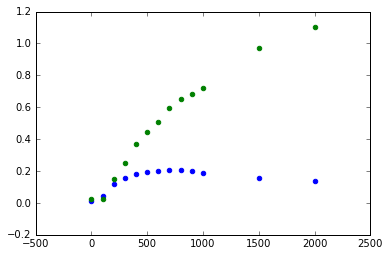

In [40]:
plt.scatter(extr,SIGM,color='b')
plt.scatter(extr,GOLDM,color='g')
plt.show()

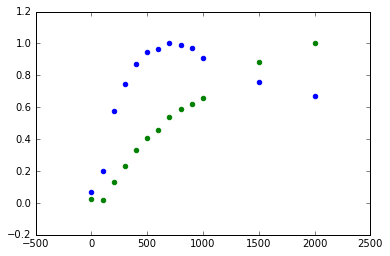

In [41]:
plt.scatter(extr,SIGM/max(SIGM),color='b')
plt.scatter(extr,GOLDM/max(GOLDM),color='g')
plt.show()

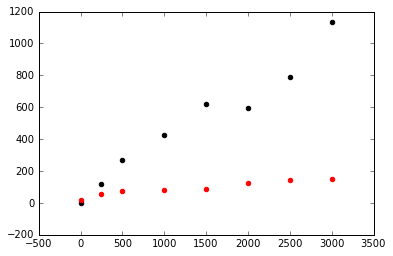

In [230]:
plt.scatter(extr,SIG,color='k')
plt.scatter(extr,GOLD,color='r')
plt.show()


In [8]:
Hold = np.loadtxt('Gol-200.txt')
GX200 = moving_average(Hold[0]*ml,avg)
GY200 = moving_average(Hold[1]*ml,avg)
Hold = np.loadtxt('Sig-200.txt')
SX200 = moving_average(Hold[0]*ml,avg)
SY200 = moving_average(Hold[1]*ml,avg)

In [9]:
aa = find_nearest(GX200,0.01)
L = np.where(GX200 == aa)[0][0]
aa = find_nearest(GX200,0.45)
R = np.where(GX200 == aa)[0][0]
GOLDsum = sum(abs(GY200[L:R]))*0.8


aa = find_nearest(SX200,0.025)
L = np.where(SX200 == aa)[0][0]
aa = find_nearest(SX200,0.465)
R = np.where(SX200 == aa)[0][0]
SIGsum = sum(abs(SY200[L:R]))

In [10]:
SIGsum/GOLDsum

0.32593764825619781

In [12]:
25/3000

0.008333333333333333

In [76]:
-0.085/np.log(SIGsum/GOLDsum)

0.093110348354314088